In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [2]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
X

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [3]:
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

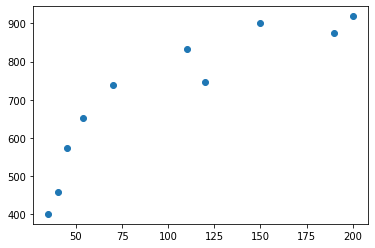

In [4]:
plt.scatter (X,y)
plt.show()

In [5]:
n= len(X)
n

10

In [6]:
b = (n*(np.sum(X*y))-(np.sum(X)*np.sum(y)))/(n*(np.sum(X**2))-((np.sum(X)**2)))
b

2.6205388824027653

In [7]:
a=np.mean(y)-b*np.mean(X)
a

444.17735732435955

In [8]:
y_hat = 444.17 + 2.62 * X
y_hat

array([535.87, 562.07, 941.97, 968.17, 548.97, 627.57, 585.65, 837.17,
       758.57, 732.37])

In [9]:
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

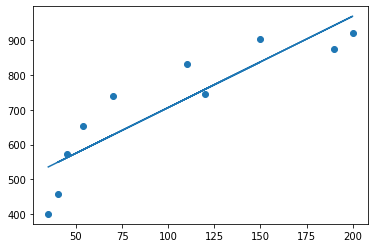

In [10]:
plt.scatter (X,y)
plt.plot(X,444.17+2.62*X)
plt.show()

In [11]:
X=X.reshape((10,1))
X

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [12]:
y=y.reshape((10,1))
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [13]:
B = np.dot(np.linalg.inv(np.dot(X.T,X)),X.T @ y)
B

array([[5.88982042]])

In [14]:
X=np.hstack([np.ones((10,1)),X])
X

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [15]:
B = np.dot(np.linalg.inv(np.dot(X.T,X)),X.T@y)
B

array([[444.17735732],
       [  2.62053888]])

2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [16]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
X

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [17]:
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [18]:
n=10

In [19]:
def mse_(B1,y=y,X=X,n=10):
    return np.sum((B1*X-y)**2)/n

In [20]:
alpha = 1e-6
alpha

1e-06

In [21]:
B1=100

n=10

In [22]:
for i in range(1000):
    B1 -=alpha*(2/n)*np.sum((B1*X-y)*X)
    if i%100==0:
        print('Iteration: {i}, B1={B1}, mse={mse}'.format(i=i,B1=B1,mse=mse_(B1)))

Iteration: 0, B1=97.4069634, mse=115440879.72879565
Iteration: 100, B1=11.488525717422952, mse=488351.28757368465
Iteration: 200, B1=6.232330030739762, mse=58133.0303957621
Iteration: 300, B1=5.910773984774674, mse=56522.907057728284
Iteration: 400, B1=5.891102287436872, mse=56516.881053205136
Iteration: 500, B1=5.889898840383066, mse=56516.85850044185
Iteration: 600, B1=5.889825217614963, mse=56516.85841603649
Iteration: 700, B1=5.88982071362622, mse=56516.85841572059
Iteration: 800, B1=5.889820438087617, mse=56516.85841571941
Iteration: 900, B1=5.889820421231109, mse=56516.8584157194


In [23]:
mse_(5.8898204)

56516.85841571941

3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

Если не известна сигма генеральной совокупности ,то используем таблицу критических точек распределения Стьюдента, если известна, то используем таблицу значений функции Лапласа


*4. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться
на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [24]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
X

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [25]:
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [26]:
n=10

In [27]:
alpha = 5e-6
alpha

5e-06

In [28]:
B1=100

In [29]:
B0=100

In [30]:
def mse_(B0,B1,y=y,X=X,n=10):
    return np.sum((B0+B1*X-y)**2)/n

In [32]:
for i in range(5000000):
    y_pred=B0+B1*X
    B0 -=alpha*(2/n)*np.sum((y_pred-y))
    B1 -=alpha*(2/n)*np.sum((y_pred-y)*X)
    if i%500000==0:
        print('Iteration: {i}, B0={B0}, B1={B1}, mse={mse}'.format(i=i,B0=B0,B1=B1,mse=mse_(B0,B1)))

Iteration: 0, B0=430.72812029722263, B1=2.719531429673801, mse=6516.297611563611
Iteration: 500000, B0=440.3937989827344, B1=2.6483875446043608, mse=6474.045493948752
Iteration: 1000000, B0=443.11296135201854, B1=2.6283733073556874, mse=6470.701587992189
Iteration: 1500000, B0=443.8779199472466, B1=2.6227428738871863, mse=6470.436945468271
Iteration: 2000000, B0=444.09311917882997, B1=2.6211589123976866, mse=6470.416001199393
Iteration: 2500000, B0=444.15365933037424, B1=2.620713310115983, mse=6470.414343633585
Iteration: 3000000, B0=444.1706905712648, B1=2.620587952653084, mse=6470.41421245095
Iteration: 3500000, B0=444.1754818239681, B1=2.620552686914853, mse=6470.414202068925
Iteration: 4000000, B0=444.1768297059427, B1=2.6205427659075875, mse=6470.414201247275
Iteration: 4500000, B0=444.177208894, B1=2.6205399749158365, mse=6470.414201182245
